In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
# Load the wine quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=";")

# Check the first few rows
wine_data.head()

# Inspect data types and missing values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_9570/1166819793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


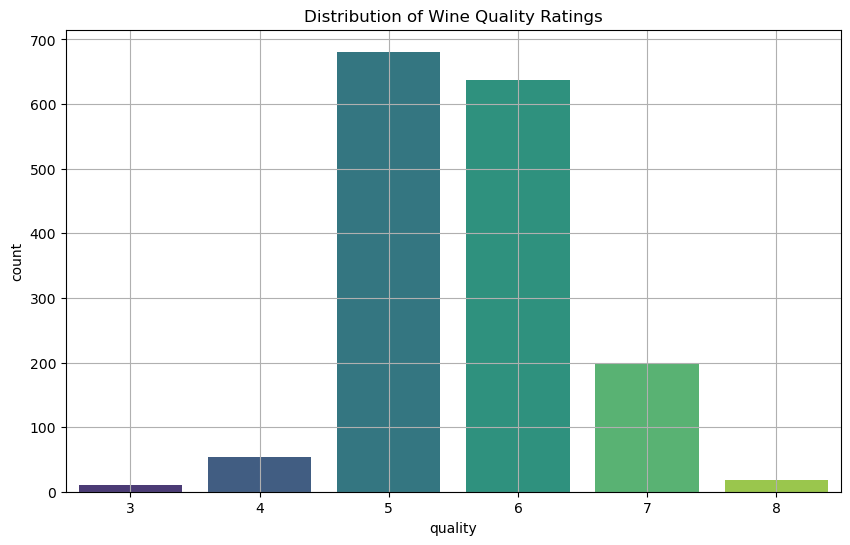

In [3]:
# Plot a distribution of wine quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.grid(True)

# Pair Plot to Understand Relationships
Task: 
- Use a pair plot to visualize the relationships between the most important features (e.g., alcohol, pH, and density) and how they relate to wine quality.
- Customize: Adjust the features you want to explore based on initial findings

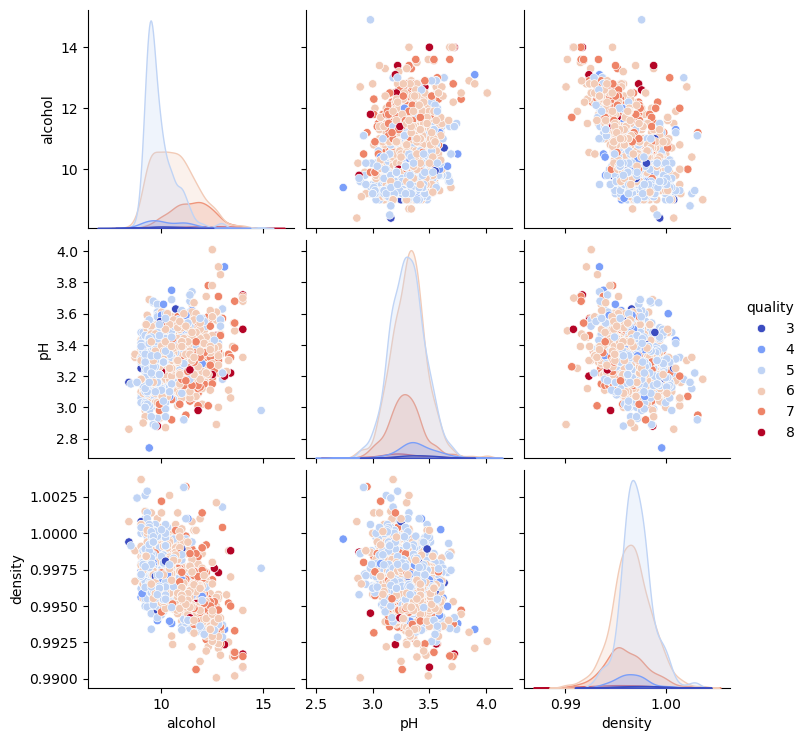

In [4]:
# Select features for pair plotting
selected_features = ["alcohol", "pH", "density", "quality"]

# Pair plot of selected features
sns.pairplot(wine_data[selected_features], hue="quality", palette='coolwarm')

# Parallel Coordinates Plot for Feature Comparisons
Task: 
- Use a parallel coordinates plot to compare chemical properties across different wine qualities.
- Customize: Change color palettes or focus on a smaller subset of wine qualities (e.g., 5-8)

<Axes: >

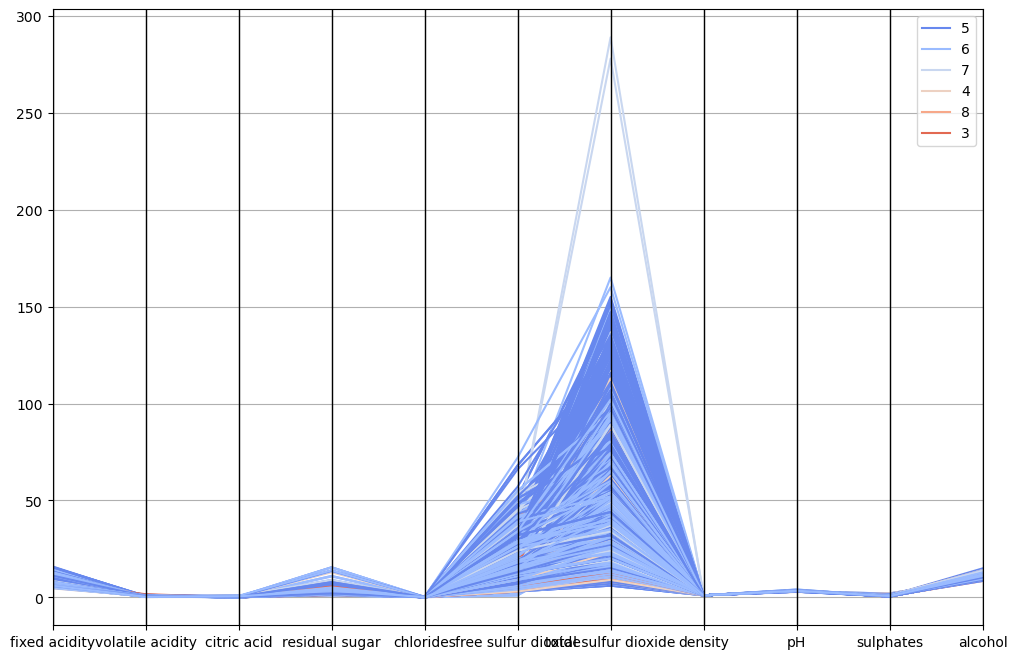

In [5]:
plt.figure(figsize=(12, 8))
parallel_coordinates(wine_data, 'quality', color=sns.color_palette("coolwarm", len(wine_data['quality'].unique())))

# Bubble Chart to Explore Alcohol, Acidity, and Quality
Task: 
- Create a bubble chart showing the relationship between alcohol content and volatile acidity, with the size of the bubbles representing wine quality.
- Customize: Try swapping different features such as 'pH' or 'density'

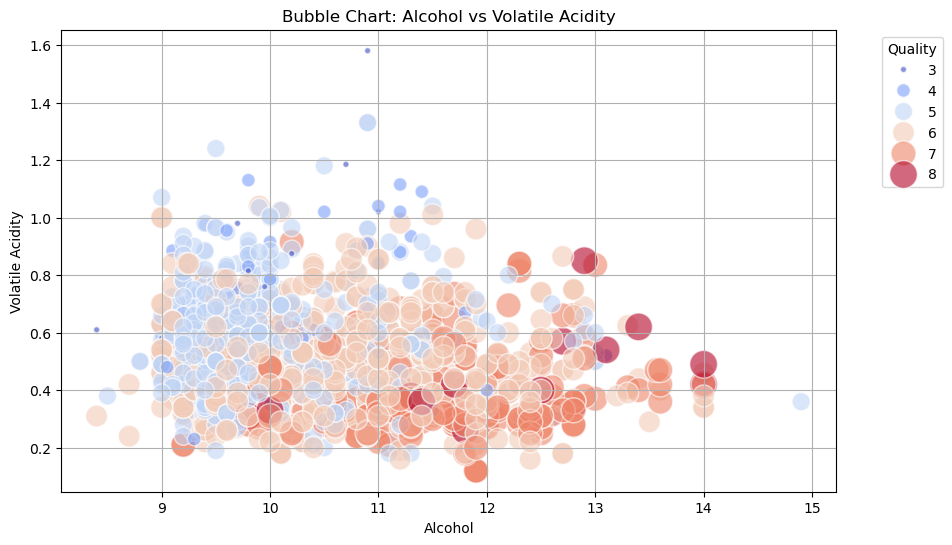

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_data, x='alcohol', y='volatile acidity', size='quality', hue='quality', palette='coolwarm', alpha=0.6, sizes=(20, 400))

# Add labels and grid
plt.title('Bubble Chart: Alcohol vs Volatile Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Heatmap of Feature Correlations
Task: 
- Visualize the correlation between various chemical properties in the wine data using a heatmap.

Text(0.5, 1.0, 'Correlation Heatmap of Wine Features')

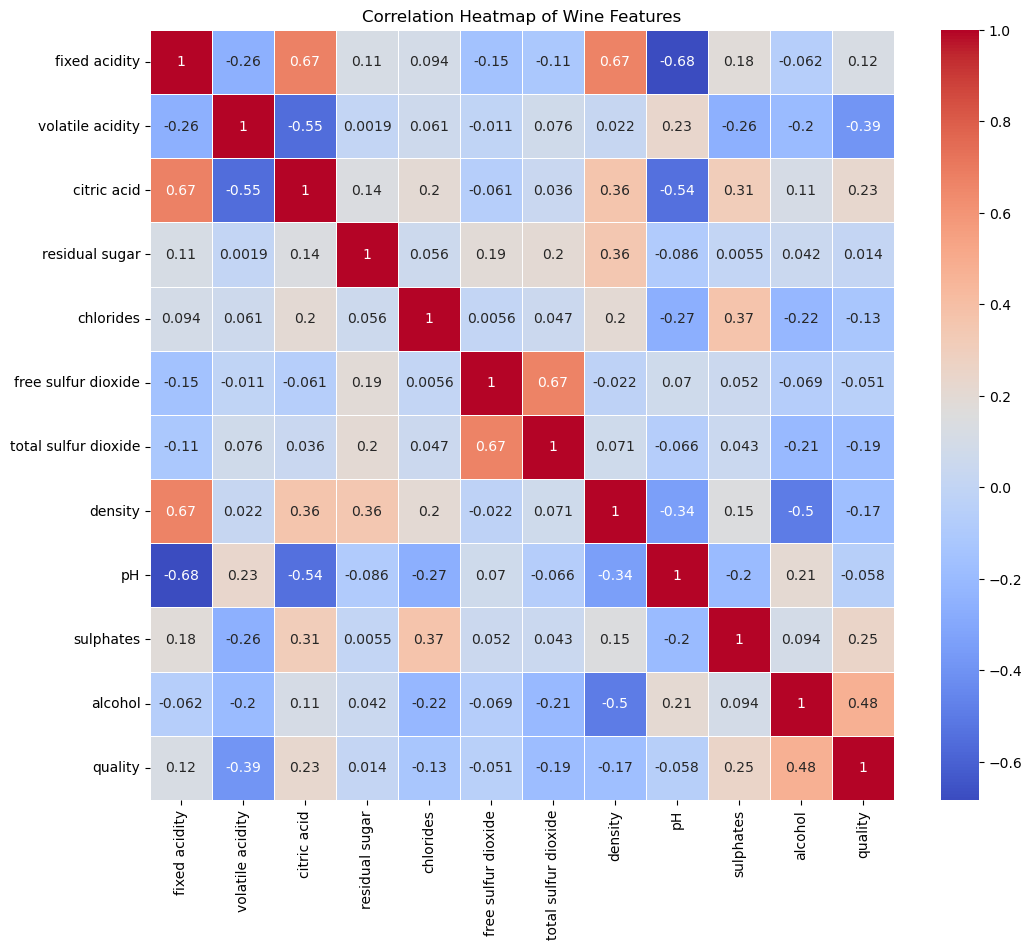

In [7]:
# Compute the correlation matrix
correlation_matrix = wine_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize: Hide parts of the heatmap (e.g., upper triangle) to make it cleaner
plt.title('Correlation Heatmap of Wine Features')

# 3D Scatter Plot of Alcohol, pH, and Quality
Task: 
- Create a 3D scatter plot to visualize the relationship between alcohol, pH, and quality.
- Customize: Experiment with different feature combinations

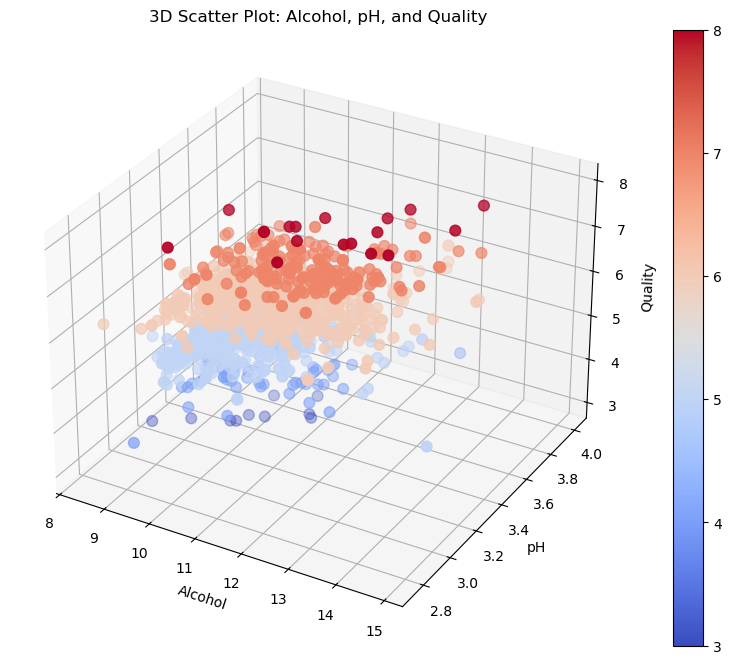

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(wine_data['alcohol'], wine_data['pH'], wine_data['quality'], 
                     c=wine_data['quality'], cmap='coolwarm', s=60)

# Add labels and title
ax.set_title("3D Scatter Plot: Alcohol, pH, and Quality")
ax.set_xlabel("Alcohol")
ax.set_ylabel("pH")
ax.set_zlabel("Quality")

# Add a color bar for quality
plt.colorbar(scatter)

# 3D Surface Plot
Task: 
- Create a 3D surface plot for a mathematical function based on alcohol and pH, visualizing how quality changes.

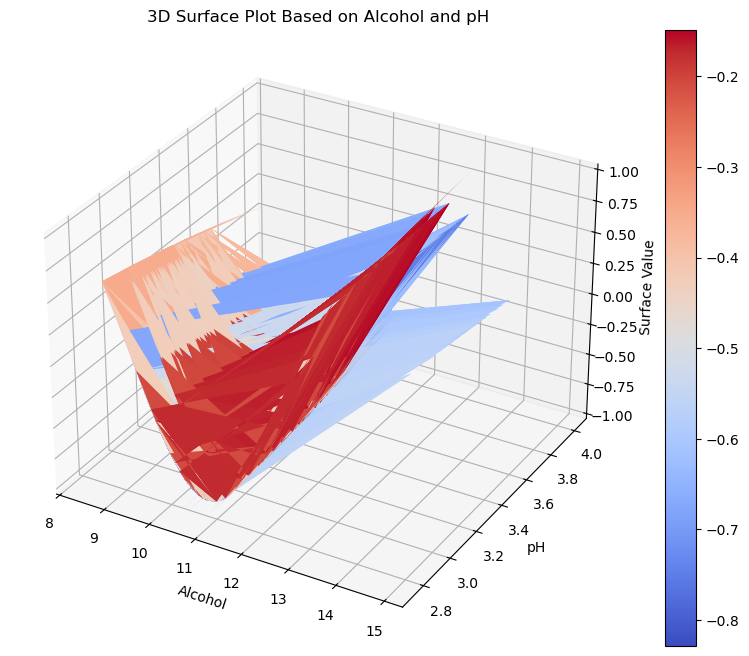

In [9]:
# Create a meshgrid for the surface plot
x = wine_data['alcohol']
y = wine_data['pH']
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x, y, z, cmap='coolwarm')

# Customize: Change the mathematical function and compare with real data trends
ax.set_title("3D Surface Plot Based on Alcohol and pH")
ax.set_xlabel("Alcohol")
ax.set_ylabel("pH")
ax.set_zlabel("Surface Value")
fig.colorbar(surface)

# Customization Challenges (bonus)
- Experiment with different subsets of the dataset, such as wines with high/low quality ratings.
- Visualize trends using violin plots or box plots for comparing quality with alcohol or pH levels.
- Add annotations to your graphs to highlight key insights or outliers.
- Compare red vs white wine datasets and draw visual comparisons.